In [1]:
import qiskit
from qiskit import *

In [2]:
def carry(circuit, qr, start_index):
    circuit.ccx(qr[start_index + 1], qr[start_index + 2], qr[start_index + 3])
    circuit.cx(qr[start_index + 1], qr[start_index +2]) 
    circuit.ccx(qr[start_index], qr[start_index + 2], qr[start_index + 3])

In [3]:
def carrydg(circuit, qr, start_index):
    circuit.ccx(qr[start_index], qr[start_index + 2], qr[start_index + 3])
    circuit.cx(qr[start_index + 1], qr[start_index +2])
    circuit.ccx(qr[start_index + 1], qr[start_index + 2], qr[start_index + 3])


In [4]:
def qrsum(circuit, qr, start_index):
    circuit.cx(qr[start_index + 1], qr[start_index + 2])
    circuit.cx(qr[start_index], qr[start_index + 2])

In [5]:
def make_adder(circuit, qr, n):
    # top to bottom
    for i in range(0, n - 2, 3):
        carry(circuit, qr, i)
        circuit.barrier()
    
    circuit.cx(qr[n - 2], qr[n - 1])
    qrsum(circuit, qr, n - 3)
    circuit.barrier()
    
    # bottom to top
    for i in range(n - 6, -1, -3):
        carrydg(circuit, qr, i)
        circuit.barrier()
        qrsum(circuit, qr, i)
        circuit.barrier()


ibmqfactory.load_account:WARNING:2020-07-01 06:03:41,036: Credentials are already in use. The existing account in the session will be replaced.


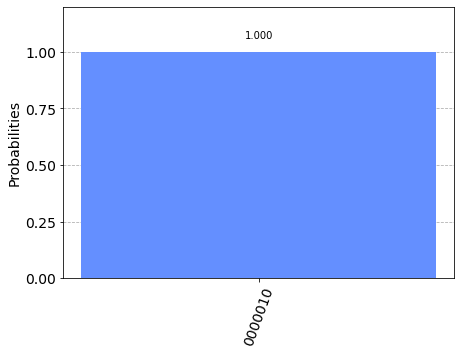

In [8]:
# mod test
size = 6 # n: 3
qr = QuantumRegister(size + 1)
cr = ClassicalRegister(size + 1)
circuit = QuantumCircuit(qr, cr)

circuit.x(1) # a0
circuit.x(2) # b0
circuit.x(4) # a1
circuit.x(5) # b1
# circuit.x(7) # a2
# circuit.x(8) # b2
# circuit.x(10) #a3
# circuit.x(11) #b3
make_adder(circuit, qr, size)

circuit.measure(qr[2], cr[0])
circuit.measure(qr[5], cr[1])
#circuit.measure(qr[11],cr[2])
"""
i = 2
j = 0
while (i < size - 2):
    circuit.measure(qr[i], cr[j])
    i += 3
    j += 1
    """
    
circuit.draw()
    
IBMQ.load_account()

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

ibmqfactory.load_account:WARNING:2020-07-01 06:03:27,550: Credentials are already in use. The existing account in the session will be replaced.


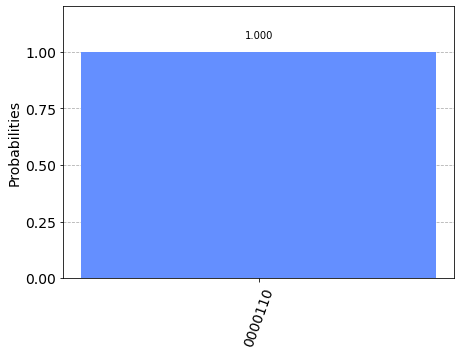

In [7]:
# adder test
size = 6
qr = QuantumRegister(size + 1)
cr = ClassicalRegister(size + 1)
circuit = QuantumCircuit(qr, cr)

circuit.x(1) # a0
circuit.x(2) # b0
circuit.x(4) # a1
circuit.x(5) # b1
#circuit.x(7) # a2
#circuit.x(8) # b2

circuit.barrier()
make_adder(circuit, qr, size)
i = 2
j = 0
while (i < size + 1):
    circuit.measure(qr[i], cr[j])
    i += 3
    j += 1
circuit.measure(qr[i - 2], cr[j])
#circuit.draw('mpl')

IBMQ.load_account()

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

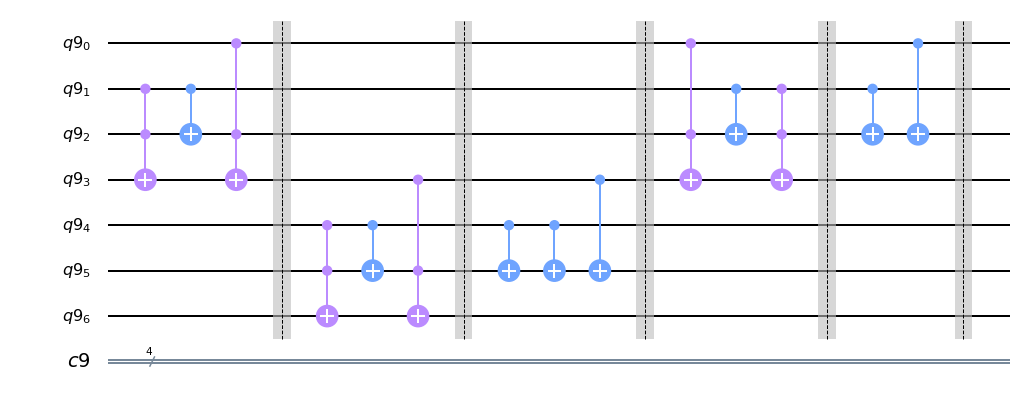

In [16]:
size = 6
qr = QuantumRegister(size + 1)
cr = ClassicalRegister(4)
circuit = QuantumCircuit(qr, cr)
make_adder(circuit, qr, 6)
circuit.draw("mpl")

In [11]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
circuit = QuantumCircuit(qr, cr)
circuit.draw()

q0_0: 
      
q0_1: 
      
q0_2: 
      
q0_3: 
      
c0_0: 
      
c0_1: 
      
c0_2: 
      
c0_3:

In [13]:
for i in range(3):
    carry(circuit, qr, 0)
circuit.draw()

q0_0: ────────────■──────────────■──────────────■──────────────■──
                  │              │              │              │  
q0_1: ──■────■────■────■────■────■────■────■────■────■────■────■──
        │  ┌─┴─┐┌─┴─┐  │  ┌─┴─┐┌─┴─┐  │  ┌─┴─┐┌─┴─┐  │  ┌─┴─┐┌─┴─┐
q0_2: ──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├
      ┌─┴─┐└───┘└───┘┌─┴─┐└───┘└───┘┌─┴─┐└───┘└───┘┌─┴─┐└───┘└───┘
q0_3: ┤ X ├──────────┤ X ├──────────┤ X ├──────────┤ X ├──────────
      └───┘          └───┘          └───┘          └───┘          
c0_0: ════════════════════════════════════════════════════════════
                                                                  
c0_1: ════════════════════════════════════════════════════════════
                                                                  
c0_2: ════════════════════════════════════════════════════════════
                                                                  
c0_3: ════════════════════════════════════════════════════════════

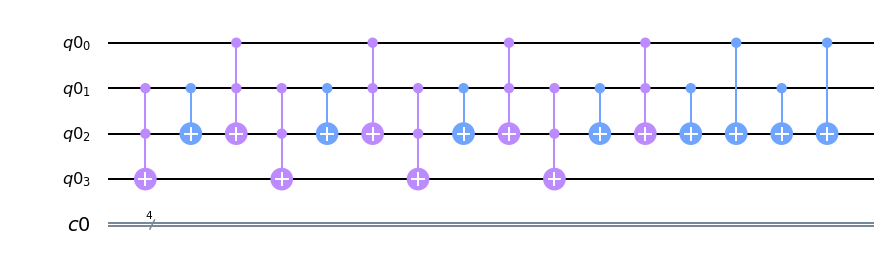

In [15]:
qrsum(circuit, qr, 0)
circuit.draw("mpl")